In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Do not change this cell
I = cv2.imread('shapes.jpg')    # Reading image
img = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)    # Converting image to grayscale
_,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)    # Spiliting values between 0 and 1
plt.imshow(img,cmap='gray')    # Displaying image
plt.show()

In [3]:
def calculate_compactness(contour):
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    
    # Calculate the perimeter of the contour
    perimeter = cv2.arcLength(contour, True)
    
    # Calculate the compactness value using the formula: (4 * pi * area) / (perimeter ** 2)
    compactness_value = (4 * math.pi * area) / (perimeter ** 2)

    # Return the calculated compactness value
    return compactness_value


In [4]:
def calculate_solidity(contour):
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    
    # Calculate the convex hull of the contour
    hull = cv2.convexHull(contour)
    
    # Calculate the area of the convex hull
    hull_area = cv2.contourArea(hull)
    
    # Check if the area of the convex hull is zero
    if hull_area == 0:
        # Set solidity to 0 if the area of the convex hull is zero to avoid division by zero
        solidity = 0
    else:
        # Calculate the solidity as the ratio of contour area to convex hull area
        solidity = area / hull_area
    
    # Return the calculated solidity value
    return solidity


In [5]:
def distance_criteria(x,y):
    """
    You should implement your distance criteria here.
    This method is used for comparing features of shapes.
    input(s):
    x (ndarray): feature vector of first shape with the shape of (n,). (n is number of features) 
    y (ndarray): feature vector of second shape with the shape of (n,). (n is number of features)
    output(s):
    output (float): Distance between features of two shapes
    """
    distance = np.linalg.norm(x - y)
    return distance

In [6]:
contours, _ = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)    # calculating contours

In [7]:
# In this cell, you should use contours that we calculated in the previous cell and 
# your defined descriptors to extract features for each shape.
# These features should be a numpy array with the shape of (m,n), where m is the number of shapes and n is the number of features.

def extract_features(contours):
    # Create an empty list to store the features
    features = []
    
    # Iterate over each contour
    for contour in contours:
        # Calculate the compactness of the contour
        compactness = calculate_compactness(contour)
        
        # Calculate the solidity of the contour
        solidity = calculate_solidity(contour)
        
        # Append the compactness and solidity values as a list to the features list
        features.append([compactness, solidity])
    
    # Convert the features list to a NumPy array
    features = np.array(features)
    
    # Return the extracted features
    return features

# Extract features from contours
features = extract_features(contours)


In [8]:
def grouping(features, threshold):
    """
    split feature between multiple groups based on their distance from each other.
    input(s):
    features (ndarray): a numpy array with the shape of (m,n), where m is the number of shapes and n is the number of features
    threshold (float): maximum distance between two feature vector which determine wether they should be in the same group or not.
    output(s):
    output (list): group of each shape. For example, [[1,2],[3,4,5]] means 1 and 2 are in the same group and 3 and 4 and 5 are in another group.
    """
    groups = list()
    groups.append([features[0],[0]])
    for i, feature in enumerate(features[1:]):
        new_group_flag = True
        for group in groups:
            if distance_criteria(group[0], feature) < threshold:
                group[1].append(i+1) 
                new_group_flag = False
                break
        if new_group_flag:
            groups.append([feature,[i+1]])
    return [[idx for idx in group[1]] for group in groups]

In [9]:
def painting(groups, contours, colors):
    """
    paint shapes base on their groups.
    input(s):
    groups (list): group of each shape. The format is as same as the output of grouping method.
    contour (ndarray): contour of the shape
    colors (list): color of each group
    """
    result = I.copy()
    for group, color in zip(groups,colors):
        for idx in group:
            plt.imshow(cv2.drawContours(result,contours,idx,color,4))
    plt.show()

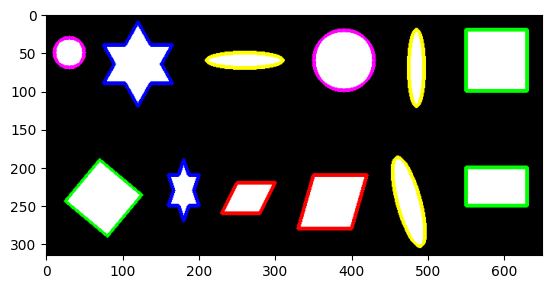

In [10]:
# You should replace your features array with None
colors = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255)]
groups = grouping(features, 0.08)
painting(groups, contours, colors)